In [92]:
import pandas as pd
import numpy as np
import zipfile
pd.set_option('display.max_columns', None)

In [93]:
zf = zipfile.ZipFile('data/data.zip')

In [94]:
df = pd.read_json(zf.open('data.json'))

In [95]:
df.head()

acct_type  approx_payout_date  body_length  channels country  \
0  fraudster_event          1266062400         3852         5      US   
1          premium          1296720000         3499         0      US   
2          premium          1296172800         2601         8      US   
3          premium          1388966400        12347         6      IE   
4          premium          1297900800         2417        11      US   

  currency  delivery_method  \
0      USD              0.0   
1      USD              1.0   
2      USD              1.0   
3      EUR              1.0   
4      USD              0.0   

                                         description  \
0  <p><a href="http://s432.photobucket.com/albums...   
1  <p>Join us for a quick, one-night, community-b...   
2  <h3><span class="subcategory"><strong>Teacher ...   
3  <p style="margin-bottom: 1.3em; padding-bottom...   
4  <p>Writers and filmmakers need to understand t...   

                 email_domain  event_created   event_end  event_published  \
0                   gmail.com     1262739706  1265630400     1.263110e+09   
1                     ruf.org     1293832670  1296288000     1.293833e+09   
2              pvsd.k12.ca.us     1291090956  1295740800     1.291092e+09   
3        irishtabletennis.com     1360681570  1388534400     1.360683e+09   
4  artsandbusinesscouncil.org     1291994666  1297468800     1.291995e+09   

   event_start  fb_published      gts  has_analytics  has_header  has_logo  \
0   1265594400             0     0.00              0         1.0         0   
1   1296255600             0   868.02              0         0.0         1   
2   1295713800             0  3500.00              0         NaN         0   
3   1360702800             0  1167.35              0         0.0         1   
4   1297440000             1  2313.15              0         0.0         0   

  listed                                               name  name_length  \
0      y  99 HOUR "NO SLEEP" SUPER BOWL CELEBRITY WEEKEN...           60   
1      n                        Winthrop RUF Winter Getaway           27   
2      y                       DRDP (2010) Teacher Training           28   
3      y                              ITTA Affiliation 2013           21   
4      y  Self Defense for Writers and Filmmakers: For A...           66   

   num_order  num_payouts  object_id  \
0          0            0     527017   
1         23            1     786878   
2         19            4     787337   
3         39           16     885645   
4         30            0    1114349   

                                            org_desc  org_facebook  \
0                                                              0.0   
1  <p>Since 1987, RUF has ministered to students ...           0.0   
2  <p><a href="http://www.desiredresults.com">www...           0.0   
3                                                              0.0   
4  <p><font face="Arial"><font size="2"><strong>T...           0.0   

                                            org_name  org_twitter  \
0              Party Starz Ent & Diverse Int'l Group          0.0   
1                         RUF at Winthrop University         12.0   
2  University Preparation School in collaboration...          0.0   
3                                                             0.0   
4         Arts & Business Council of Greater Boston           0.0   

                                    payee_name payout_type  \
0                                                            
1                                          RUF       CHECK   
2                University Preparation School       CHECK   
3                                                      ACH   
4  Arts and Business Council or Greater Boston       CHECK   

                                    previous_payouts  sale_duration  \
0                                                 []           29.0   
1  [{'name': 'RUF', 'created': '2010-10-01 01:10:...           28

In [118]:
df['ticket_types'][14]

[{'event_id': 1245809,
  'cost': 150.0,
  'availability': 1,
  'quantity_total': 1000,
  'quantity_sold': 49},
 {'event_id': 1245809,
  'cost': 75.0,
  'availability': 1,
  'quantity_total': 1000,
  'quantity_sold': 9}]

In [126]:
df['previous_payouts'][1]

[{'name': 'RUF',
  'created': '2010-10-01 01:10:09',
  'country': 'US',
  'amount': 34389.38,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 786869,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-02-02 01:12:10',
  'country': 'US',
  'amount': 764.93,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 786878,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-03-15 01:30:42',
  'country': 'US',
  'amount': 17405.26,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 1181203,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-03-15 01:30:42',
  'country': 'US',
  'amount': 2224.16,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 1293213,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-04-01 01:30:31',
  'country': 'US',
  'amount': 5370.58,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419

In [113]:
l = df['ticket_types'].str.len()
df1 = pd.DataFrame(np.concatenate(df['ticket_types']).tolist(), index=np.repeat(df.index, l))

df1['total_cost'] = df1['cost'] * df1['quantity_sold']

#df2 = df1.groupby('

df3 = df.drop('ticket_types', axis=1).join(df1).reset_index(drop=True)
df1.reset_index(inplace=True)
df2 = df1[['total_cost', 'index']].groupby('index').sum()
df4 = df.join(df2).reset_index()
df4 = df4.drop('index', axis=1)
df4

acct_type  approx_payout_date  body_length  channels country  \
0      fraudster_event          1266062400         3852         5      US   
1              premium          1296720000         3499         0      US   
2              premium          1296172800         2601         8      US   
3              premium          1388966400        12347         6      IE   
4              premium          1297900800         2417        11      US   
...                ...                 ...          ...       ...     ...   
14332  fraudster_event          1361689200          667         0      US   
14333          premium          1365566400         5812         5      US   
14334          premium          1368781200          557        13           
14335         tos_warn          1361361600        10873         8      US   
14336  fraudster_event          1363316400            0         0      GB   

      currency  delivery_method  \
0          USD              0.0   
1          USD              1.0   
2          USD              1.0   
3          EUR              1.0   
4          USD              0.0   
...        ...              ...   
14332      USD              0.0   
14333      USD              1.0   
14334      USD              0.0   
14335      USD              0.0   
14336      GBP              0.0   

                                             description  \
0      <p><a href="http://s432.photobucket.com/albums...   
1      <p>Join us for a quick, one-night, community-b...   
2      <h3><span class="subcategory"><strong>Teacher ...   
3      <p style="margin-bottom: 1.3em; padding-bottom...   
4      <p>Writers and filmmakers need to understand t...   
...                                                  ...   
14332  <p>Celebrates this wonderful holiday with the ...   
14333  <table style="width: 600px;" border="0" cellsp...   
14334  <p>What a way to start off your Mother's Day l...   
14335  <p style="font-family: 'Helvetica Neue', Helve...   
14336                                                      

                     email_domain  event_created   event_end  event_published  \
0                       gmail.com     1262739706  1265630400     1.263110e+09   
1                         ruf.org     1293832670  1296288000     1.293833e+09   
2                  pvsd.k12.ca.us     1291090956  1295740800     1.291092e+09   
3            irishtabletennis.com     1360681570  1388534400     1.360683e+09   
4      artsandbusinesscouncil.org     1291994666  1297468800     1.291995e+09   
...                           ...            ...         ...              ...   
14332                   yahoo.com     1360297993  1361257200     1.360299e+09   
14333                      me.com     1360367042  1365134400     1.360370e+09   
14334                   yahoo.com     1360600330  1368349200     1.361337e+09   
14335              velvetlist.com     1360376285  1360929600     1.360377e+09   
14336                   gmail.com     1360686846  1362888000     1.360687e+09   

       event_start  fb_published      gts  has_analytics  has_header  \
0       1265594400             0     0.00              0         1.0   
1       1296255600             0   868.02              0         0.0   
2       1295713800             0  3500.00              0         NaN   
3       1360702800             0  1167.35              0         0.0   
4       1297440000             1  2313.15              0         0.0   
...            ...           ...      ...            ...         ...   
14332   1361232000             0     0.00              0         NaN   
14333   1365123600             0  9626.30              0         1.0   
14334   1368327600             1    22.09              0         0.0   
14335   1360890000             0   170.00              0         0.0   
14336   1360740600             0   901.04              0         NaN   

       has_logo listed                                               name  \
0             0      y  99 HOUR

In [123]:
df_temp = df4[['total_cost', 'gts', 'country', 'currency']]

In [124]:
df_temp.head(50)

total_cost       gts country currency
0         0.00      0.00      US      USD
1       875.00    868.02      US      USD
2      4488.48   3500.00      US      USD
3       795.00   1167.35      IE      EUR
4      2399.00   2313.15      US      USD
5       428.00    302.57      US      USD
6      1332.92    832.64      US      USD
7       798.00    220.64      US      USD
8      3500.00   3706.36      US      USD
9       896.00    535.84      US      USD
10      945.42    750.00      US      USD
11      630.00    685.44      US      USD
12      629.09    178.00      US      USD
13      770.00    833.14      US      USD
14     8025.00   1038.56      US      USD
15     2370.00   2723.44      US      USD
16     1860.00   2146.44      US      USD
17       30.00     34.62      US      USD
18     3792.64   1996.00      US      USD
19    43660.00  14424.18      US      USD
20    12102.00   3855.28      FR      EUR
21      100.00    106.49      US      USD
22      250.00    268.70      US      USD
23      216.20    132.00      US      USD
24     1595.00   1326.48      US      USD
25      100.00    107.48      US      USD
26      600.00    634.98      US      USD
27     5067.54   5860.00      US      USD
28    10287.06  10438.00      US      USD
29     1345.00   1485.14      US      USD
30    14799.52  16210.00      US      USD
31       70.00    120.01      US      USD
32      660.04    725.00      US      USD
33      502.36    540.00      US      USD
34       60.00     66.27      US      USD
35     8101.25   8005.66      CA      CAD
36      467.13    515.96      US      USD
37     7447.56   1336.03      US      USD
38     1635.00   1899.53      US      USD
39     7753.25   4859.48      US      USD
40        0.00      2.04      US      USD
41      135.00    145.38      US      USD
42        0.00     77.76      US      USD
43       45.00     48.46      US      USD
44       30.00     52.62      GB      GBP
45      913.41   1203.31      US      USD
46        5.00      6.26      US      USD
47     1050.00   1133.57      US      USD
48     1080.04   1170.00      US      USD
49       90.00    103.86      US      USD

In [4]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [5]:
df['fraud'] = df['acct_type'].apply(lambda x: True if 'fraud' in x else False)

In [6]:
df['fraud'].value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

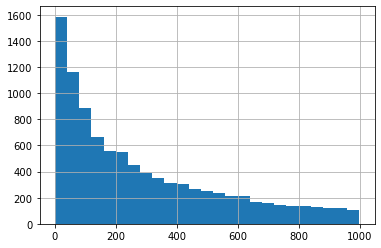

In [7]:
df['gts'][df['gts']<1000].hist(bins=25)

In [8]:
df[df['fraud']==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           1293 non-null   object 
 1   approx_payout_date  1293 non-null   int64  
 2   body_length         1293 non-null   int64  
 3   channels            1293 non-null   int64  
 4   country             1293 non-null   object 
 5   currency            1293 non-null   object 
 6   delivery_method     1281 non-null   float64
 7   description         1293 non-null   object 
 8   email_domain        1293 non-null   object 
 9   event_created       1293 non-null   int64  
 10  event_end           1293 non-null   int64  
 11  event_published     1199 non-null   float64
 12  event_start         1293 non-null   int64  
 13  fb_published        1293 non-null   int64  
 14  gts                 1293 non-null   float64
 15  has_analytics       1293 non-null   int64  
 16  has_h

In [9]:
drop_cols = ['has_header', 
             'venue_address',
             'venue_country',
             'venue_latitude',
             'venue_longitude',
             'venue_name',
             'venue_state']
for col in drop_cols:
    try:
        df.pop(col)
    except:
        continue

look_later = ['acct_type',
              'description',
              'name',
              'org_desc',
              'org_name',
              'payee_name',
              'previous_payouts',
              'ticket_types', # grab cost out of ticket types
              'user_created',
              'email_domain'] # maybe create dummies for anonymous email domains
for col in look_later:
    try:
        df.pop(col)
    except:
        continue


df.dropna(inplace=True)

In [10]:
df['listed'] = df['listed'].apply(lambda x: 1 if 'y' else 0)


In [11]:
dummies = ['country',
           'currency',
           'payout_type']


In [12]:
df_analysis = pd.get_dummies(df, prefix_sep='_')

In [13]:
#  EDA vis ideas:
#  prop fraud by payout type
# 

df

approx_payout_date  body_length  channels country currency  \
0              1266062400         3852         5      US      USD   
1              1296720000         3499         0      US      USD   
2              1296172800         2601         8      US      USD   
3              1388966400        12347         6      IE      EUR   
4              1297900800         2417        11      US      USD   
...                   ...          ...       ...     ...      ...   
14332          1361689200          667         0      US      USD   
14333          1365566400         5812         5      US      USD   
14334          1368781200          557        13              USD   
14335          1361361600        10873         8      US      USD   
14336          1363316400            0         0      GB      GBP   

       delivery_method  event_created   event_end  event_published  \
0                  0.0     1262739706  1265630400     1.263110e+09   
1                  1.0     1293832670  1296288000     1.293833e+09   
2                  1.0     1291090956  1295740800     1.291092e+09   
3                  1.0     1360681570  1388534400     1.360683e+09   
4                  0.0     1291994666  1297468800     1.291995e+09   
...                ...            ...         ...              ...   
14332              0.0     1360297993  1361257200     1.360299e+09   
14333              1.0     1360367042  1365134400     1.360370e+09   
14334              0.0     1360600330  1368349200     1.361337e+09   
14335              0.0     1360376285  1360929600     1.360377e+09   
14336              0.0     1360686846  1362888000     1.360687e+09   

       event_start  fb_published      gts  has_analytics  has_logo  listed  \
0       1265594400             0     0.00              0         0       1   
1       1296255600             0   868.02              0         1       1   
2       1295713800             0  3500.00              0         0       1   
3       1360702800             0  1167.35              0         1       1   
4       1297440000             1  2313.15              0         0       1   
...            ...           ...      ...            ...       ...     ...   
14332   1361232000             0     0.00              0         1       1   
14333   1365123600             0  9626.30              0         0       1   
14334   1368327600             1    22.09              0         1       1   
14335   1360890000             0   170.00              0         1       1   
14336   1360740600             0   901.04              0         1       1   

       name_length  num_order  num_payouts  object_id  org_facebook  \
0               60          0            0     527017           0.0   
1               27         23            1     786878           0.0   
2               28         19            4     787337           0.0   
3               21         39           16     885645           0.0   
4               66         30            0    1114349           0.0   
...            ...        ...          ...        ...           ...   
14332           27          0            0    5456442           0.0   
14333           42         33            4    5465112           0.0   
14334           67          1            0    5465732           0.0   
14335           54          2          101    5465810           0.0   
14336           11          2            0    5492990           0.0   

       org_twitter payout_type  sale_duration  sale_duration2  show_map  \
0              0.0                       29.0              33         1   
1             12.0       CHECK           28.0              28         0   
2              0.0       CHECK           54.0              54         0   
3              0.0         ACH            0.0               0         0   
4              0.0       CHECK           63.0              63         0   
...            ...         ...            ...             ...       ...   
14332          0.0    

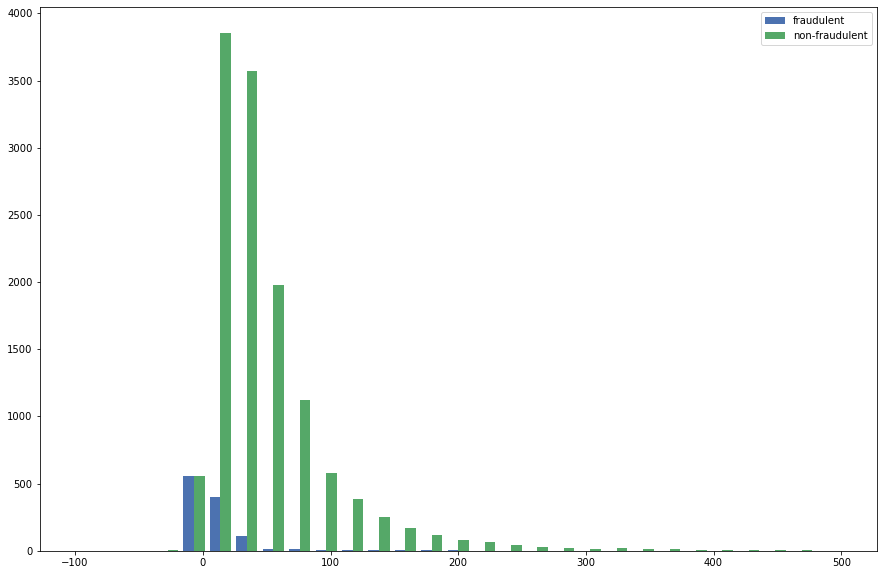

In [45]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

fraud = df['sale_duration'][df['fraud']==True]
no_fraud = df['sale_duration'][df['fraud']==False]

bins = np.linspace(-100, 500, 30)
plt.figure(figsize=(15,10))
plt.hist([fraud, no_fraud], bins, label=['fraudulent', 'non-fraudulent'])
plt.legend(loc = 'upper right')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
y = df_analysis.pop('fraud')
X = df_analysis.copy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=1)

In [18]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)


In [19]:
print(f"F1: {f1_score(y_test, y_predict)}")
print(f"precision: {precision_score(y_test, y_predict)}")
print(f"recall: {recall_score(y_test, y_predict)}")

F1: 0.8652482269503546
precision: 0.9289340101522843
recall: 0.8097345132743363


In [20]:
confusion_matrix(y_test, y_predict)

array([[2571,   14],
       [  43,  183]])

In [21]:
importances = rf.feature_importances_
n=10
indices = np.argsort(importances)[::-1]
features = list(df_analysis.columns[indices])
print("Feature ranking:")
for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

Feature ranking:
1. sale_duration2 (0.142961)
2. sale_duration (0.115510)
3. gts (0.076042)
4. user_age (0.073552)
5. payout_type_ (0.062099)
6. num_order (0.045645)
7. num_payouts (0.044362)
8. user_type (0.036663)
9. body_length (0.036386)
10. name_length (0.032828)


In [22]:
from src.helper_functions import gridsearch_with_output

random_forest_grid = {'max_depth': [2, 4, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'oob_score': [True, False],
                      'n_estimators': [20, 30, 40, 50],
                      'class_weight': ['balanced', None],
                      'random_state': [1]
                     }
rf_best_params, rf_best_model, rf_best_score = gridsearch_with_output(RandomForestClassifier(), 
                                                                      random_forest_grid, 
                                                                      score,
                                                                      X_train, y_train)

NameError: name 'score' is not defined

In [ ]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_predict = gb.predict(X_test)

In [ ]:
print(f"F1: {f1_score(y_test, y_predict)}")
print(f"precision: {precision_score(y_test, y_predict)}")
print(f"recall: {recall_score(y_test, y_predict)}")

In [ ]:
confusion_matrix(y_test, y_predict)

In [ ]:
importances = gb.feature_importances_
n=10
indices = np.argsort(importances)[::-1]
features = list(df_analysis.columns[indices])
print("Feature ranking:")
for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))